A proposta desse arquivo é começar. Serão passos simples a partir da evolução dos meus estudos. <br>
Esse primeiro notebook conta com o material do curso do Quanta e algumas inspirações de alguns códigos analisados.

Passo 1:<br>
Baixar a série da ação que vamos analisar de acordo com o curso temos dois modos:<br>
    a. o modo dinâmico direto do site;<br>
    b. lendo um arquivo .csv<br>

##Bibliotecas 

In [2]:
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
import pandas as pd

##Dataset

In [3]:
portfolio = ['AERI3.SA','ARCE','HAPV3.SA','MDIA3.SA','^BVSP']
pdf = yf.download(portfolio, start="2020-12-01", end="2022-07-29")
pdf.head()


[*********************100%***********************]  5 of 5 completed


Adj Close                                               Close  \
            AERI3.SA       ARCE   HAPV3.SA   MDIA3.SA     ^BVSP AERI3.SA   
Date                                                                       
2020-12-01  6.776420  37.740002  14.353739  29.895779  111335.0     6.80   
2020-12-02  6.876073  37.110001  14.712084  30.167479  111814.0     6.90   
2020-12-03  6.876073  37.459999  15.090337  30.267103  112919.0     6.90   
2020-12-04  6.945830  37.650002  15.259557  30.294271  113682.0     6.97   
2020-12-07  7.214894  36.700001  14.960936  30.638420  113625.0     7.24   

                                                     ...     Open             \
                 ARCE HAPV3.SA   MDIA3.SA     ^BVSP  ... AERI3.SA       ARCE   
Date                                                 ...                       
2020-12-01  37.740002    14.42  33.009998  111335.0  ...     6.70  43.830002   
2020-12-02  37.110001    14.78  33.310001  111814.0  ...     6.80  37.750000   
2020-12-03  37.459999    15.16  33.419998  112919.0  ...     7.00  37.400002   
2020-12-04  37.650002    15.33  33.450001  113682.0  ...     6.92  37.709999   
2020-12-07  36.700001    15.03  33.830002  113625.0  ...     7.00  37.669998   

                                             Volume                        \
           HAPV3.SA   MDIA3.SA     ^BVSP   AERI3.SA      ARCE    HAPV3.SA   
Date                                                                        
2020-12-01    14.48  32.610001  108897.0  1095100.0  769900.0  13444400.0   
2020-12-02    14.34  33.099998  111402.0   737800.0  643400.0  12189600.0   
2020-12-03    14.73  33.400002  111874.0   769100.0  623300.0   7149400.0   
2020-12-04    15.20  33.639999  112294.0   302600.0  153400.0   3984300.0   
2020-12-07    15.36  33.500000  113751.0  2056700.0  405800.0   8342600.0   

                                   
             MDIA3.SA       ^BVSP  
Date                               
2020-12-01  1704300.0  11324800.0  
2020-12-02  1096700.0   9814300.0  
2020-12-03  1102100.0  11474200.0  
2020-12-04   730400.0   8892900.0  
2020-12-07   677400.0   9633900.0  

[5 rows x 30 columns]

##Análise Geral / Data Wrangling

In [4]:
pdf.shape

(427, 30)

In [5]:
#verificando se os dados estão no formato correto
pdf["Close"].dtypes

AERI3.SA    float64
ARCE        float64
HAPV3.SA    float64
MDIA3.SA    float64
^BVSP       float64
dtype: object

In [6]:
#verificando a quantidade de valores nulos
pdf["Close"].isna().sum()

AERI3.SA    16
ARCE        10
HAPV3.SA    16
MDIA3.SA    16
^BVSP       16
dtype: int64

In [7]:
#excluindo as linhas com valores nulos
pdf.dropna()

Adj Close                                               Close  \
            AERI3.SA       ARCE   HAPV3.SA   MDIA3.SA     ^BVSP AERI3.SA   
Date                                                                       
2020-12-01  6.776420  37.740002  14.353739  29.895779  111335.0     6.80   
2020-12-02  6.876073  37.110001  14.712084  30.167479  111814.0     6.90   
2020-12-03  6.876073  37.459999  15.090337  30.267103  112919.0     6.90   
2020-12-04  6.945830  37.650002  15.259557  30.294271  113682.0     6.97   
2020-12-07  7.214894  36.700001  14.960936  30.638420  113625.0     7.24   
...              ...        ...        ...        ...       ...      ...   
2022-07-22  2.950000  13.990000   5.950000  30.850000   98925.0     2.95   
2022-07-25  2.780000  13.850000   5.800000  30.799999  100270.0     2.78   
2022-07-26  2.860000  13.500000   5.500000  31.049999   99772.0     2.86   
2022-07-27  2.940000  14.660000   5.860000  31.760000  101438.0     2.94   
2022-07-28  3.050000  15.550000   6.130000  31.290001  102597.0     3.05   

                                                     ...     Open             \
                 ARCE HAPV3.SA   MDIA3.SA     ^BVSP  ... AERI3.SA       ARCE   
Date                                                 ...                       
2020-12-01  37.740002    14.42  33.009998  111335.0  ...     6.70  43.830002   
2020-12-02  37.110001    14.78  33.310001  111814.0  ...     6.80  37.750000   
2020-12-03  37.459999    15.16  33.419998  112919.0  ...     7.00  37.400002   
2020-12-04  37.650002    15.33  33.450001  113682.0  ...     6.92  37.709999   
2020-12-07  36.700001    15.03  33.830002  113625.0  ...     7.00  37.669998   
...               ...      ...        ...       ...  ...      ...        ...   
2022-07-22  13.990000     5.95  30.850000   98925.0  ...     2.83  14.560000   
2022-07-25  13.850000     5.80  30.799999  100270.0  ...     2.97  13.990000   
2022-07-26  13.500000     5.50  31.049999   99772.0  ...     2.78  13.700000   
2022-07-27  14.660000     5.86  31.760000  101438.0  ...     2.86  13.790000   
2022-07-28  15.550000     6.13  31.290001  102597.0  ...     2.93  14.960000   

                                             Volume                        \
           HAPV3.SA   MDIA3.SA     ^BVSP   AERI3.SA      ARCE    HAPV3.SA   
Date                                                                        
2020-12-01    14.48  32.610001  108897.0  1095100.0  769900.0  13444400.0   
2020-12-02    14.34  33.099998  111402.0   737800.0  643400.0  12189600.0   
2020-12-03    14.73  33.400002  111874.0   769100.0  623300.0   7149400.0   
2020-12-04    15.20  33.639999  112294.0   302600.0  153400.0   3984300.0   
2020-12-07    15.36  33.500000  113751.0  2056700.0  405800.0   8342600.0   
...             ...        ...       ...        ...       ...         ...   
2022-07-22     6.13  30.809999   99034.0  2539800.0  212700.0  22457100.0   
2022-07-25     6.00  30.879999   98926.0  2782600.0  190600.0  25022000.0   
2022-07-26     5.78  30.809999  100270.0  2899600.0   42500.0  68991300.0   
2022-07-27     5.59  31.110001   99773.0  4124800.0  242900.0  28477400.0   
2022-07-28     5.80  31.700001  101437.0  3897100.0  141300.0  33735800.0   

                                   
             MDIA3.SA       ^BVSP  
Date                               
2020-12-01  1704300.0  11324800.0  
2020-12-02  1096700.0   9814300.0  
2020-12-03  1102100.0  11474200.0  
2020-12-04   730400.0   8892900.0  
2020-12-07   677400.0   9633900.0  
...               ...         ...  
2022-07-22   843800.0  10033500.0  
2022-07-25   642000.0   8621800.0  
2022-07-26  1071300.0   9136600.0  
2022-07-27  1187400.0  10263100.0  
2022-07-28   775100.0  11130000.0  

[401 rows x 30 columns]

##Estatística Descritiva

In [8]:
print(pdf["Close"].count())

AERI3.SA    411
ARCE        417
HAPV3.SA    411
MDIA3.SA    411
^BVSP       411
dtype: int64


In [9]:
print(pdf["Close"].mean())

AERI3.SA         7.467835
ARCE            24.348417
HAPV3.SA        12.736959
MDIA3.SA        28.439538
^BVSP       113912.622871
dtype: float64


In [10]:
print(pdf["Close"].median())

AERI3.SA         7.940000
ARCE            22.530001
HAPV3.SA        13.600000
MDIA3.SA        29.620001
^BVSP       113900.000000
dtype: float64


In [11]:
#Diferença em relação ao dia anterior em valor absoluto
print(pdf["Close"].diff())

            AERI3.SA      ARCE  HAPV3.SA  MDIA3.SA   ^BVSP
Date                                                      
2020-12-01       NaN       NaN       NaN       NaN     NaN
2020-12-02      0.10 -0.630001      0.36  0.300003   479.0
2020-12-03      0.00  0.349998      0.38  0.109997  1105.0
2020-12-04      0.07  0.190002      0.17  0.030003   763.0
2020-12-07      0.27 -0.950001     -0.30  0.380001   -57.0
...              ...       ...       ...       ...     ...
2022-07-22      0.12 -0.510000     -0.14  0.100000  -108.0
2022-07-25     -0.17 -0.139999     -0.15 -0.050001  1345.0
2022-07-26      0.08 -0.350000     -0.30  0.250000  -498.0
2022-07-27      0.08  1.160000      0.36  0.710001  1666.0
2022-07-28      0.11  0.890000      0.27 -0.469999  1159.0

[427 rows x 5 columns]


In [12]:
#Diferença em relação ao dia anterior em porcentagem
print(pdf["Close"].pct_change())

            AERI3.SA      ARCE  HAPV3.SA  MDIA3.SA     ^BVSP
Date                                                        
2020-12-01       NaN       NaN       NaN       NaN       NaN
2020-12-02  0.014706 -0.016693  0.024965  0.009088  0.004302
2020-12-03  0.000000  0.009431  0.025710  0.003302  0.009882
2020-12-04  0.010145  0.005072  0.011214  0.000898  0.006757
2020-12-07  0.038737 -0.025232 -0.019569  0.011360 -0.000501
...              ...       ...       ...       ...       ...
2022-07-22  0.042403 -0.035172 -0.022989  0.003252 -0.001091
2022-07-25 -0.057627 -0.010007 -0.025210 -0.001621  0.013596
2022-07-26  0.028777 -0.025271 -0.051724  0.008117 -0.004967
2022-07-27  0.027972  0.085926  0.065455  0.022866  0.016698
2022-07-28  0.037415  0.060709  0.046075 -0.014798  0.011426

[427 rows x 5 columns]


##Visualização dos Dados

#Acompanhamento no tempo do preço de fechamento e volume de negociação

Para uma vizualização mais nítida do gráfico, gerei um novo portfólio excluindo o Ibovespa (já que seu índice é bem superior aos demais analizados).

In [51]:
portfolio2 = ['AERI3.SA','ARCE','HAPV3.SA','MDIA3.SA']
closegraph = yf.download(portfolio2, start="2020-12-01", end="2022-07-29")["Close"]
volumegraph = yf.download(portfolio2, start="2020-12-01", end="2022-07-29")["Volume"]

[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  4 of 4 completed


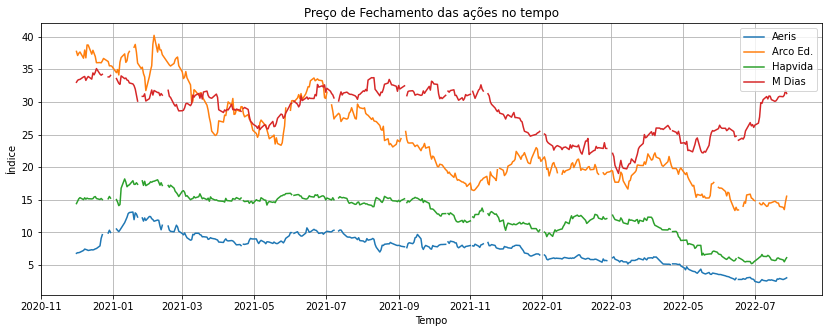

In [52]:
# Plotando os dados com os preços de fechamento

plt.figure(figsize=(14, 5))

plt.plot(closegraph["AERI3.SA"], lw=1.5, label='Aeris')
plt.plot(closegraph["ARCE"], lw=1.5, label='Arco Ed.')
plt.plot(closegraph["HAPV3.SA"], lw=1.5, label='Hapvida')
plt.plot(closegraph["MDIA3.SA"], lw=1.5, label='M Dias')


plt.grid(True)

plt.legend(loc=0)

# Ajustando a figura às margens
plt.axis('tight')

plt.xlabel('Tempo')
plt.ylabel('Índice')
plt.title('Preço de Fechamento das ações no tempo')

plt.show()

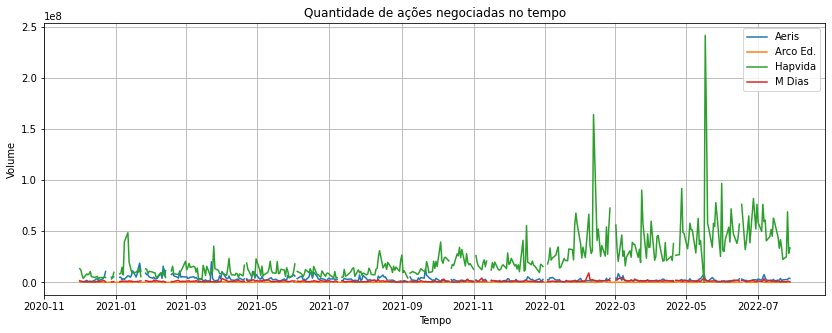

In [53]:
#plotando os dados com o volume negociado

plt.figure(figsize=(14, 5))

plt.plot(volumegraph["AERI3.SA"], lw=1.5, label='Aeris')
plt.plot(volumegraph["ARCE"], lw=1.5, label='Arco Ed.')
plt.plot(volumegraph["HAPV3.SA"], lw=1.5, label='Hapvida')
plt.plot(volumegraph["MDIA3.SA"], lw=1.5, label='M Dias')

plt.grid(True)

plt.legend(loc=0)

# Ajustando a figura às margens
plt.axis('tight')

plt.xlabel('Tempo')
plt.ylabel('Volume')
plt.title('Quantidade de ações negociadas no tempo')

plt.show()

#Analisando dispersão e Correlação da carteira

Para os próximos gráficos voltei com o primeiro portfólio (considerando Ibovespa)

array([[<AxesSubplot:title={'center':'AERI3.SA'}>,
        <AxesSubplot:title={'center':'ARCE'}>],
       [<AxesSubplot:title={'center':'HAPV3.SA'}>,
        <AxesSubplot:title={'center':'MDIA3.SA'}>],
       [<AxesSubplot:title={'center':'^BVSP'}>, <AxesSubplot:>]],
      dtype=object)

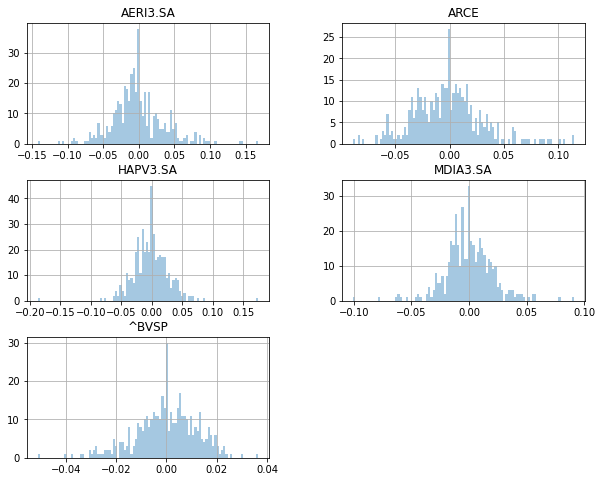

In [46]:
retornos = pdf["Close"].pct_change()
retornos.hist(bins=100, figsize=(10,8), alpha=0.4)

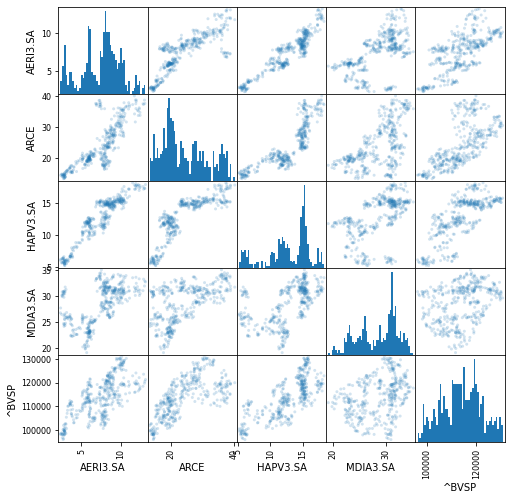

In [14]:
from pandas.plotting import scatter_matrix
scatter_matrix(pdf["Close"], figsize=(8,8), alpha = 0.2, hist_kwds = {'bins': 50});

In [ ]:
pip install seaborn

<AxesSubplot:>

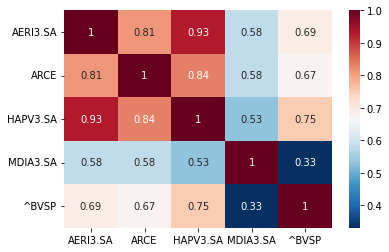

In [56]:
import seaborn as sns
corrmat = pdf["Close"].corr()
sns.heatmap(corrmat, annot=True, cmap="RdBu_r")